# Running 2 stage unwrapping using the custom command line tool

Test data is from the UAVSAR track 05502 version 1 over San Fransisco

In [1]:
cd /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/Igrams/20090220_20100301

/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/Igrams/20090220_20100301


In [2]:
cmd = '../../../JPL_internship/UAVSAR_SNAPHU_2stage.py'

In [3]:
!{cmd} -h

usage: UAVSAR_SNAPHU_2stage.py [-h] [-i IFG_FILE] [-c COR_FILE]
                               [-s SHAPE SHAPE] [-m MASK_FILE]
                               [--tiles TILES TILES] [--looks LOOKS LOOKS]
                               [--overlap OVERLAP]

Two stage unwrapping of UAVSAR ifg with SNAPHU.

optional arguments:
  -h, --help           show this help message and exit
  -i IFG_FILE          Interferogram file to be unwrapped
  -c COR_FILE          Correlation file
  -s SHAPE SHAPE       Shape of interferogram e.g. (ROWS COLS)
  -m MASK_FILE         Water mask file.
  --tiles TILES TILES  Number of tiles in for SNAPHU processing (ROWS COLS)
  --looks LOOKS LOOKS  Number of looks for initial unwrapping (ROWS COLS)
  --overlap OVERLAP    Overlap for tile processing

source:
  Script author: Forrest Williams
  Origional workflow: Scott Staniewicz

example:
  UAVSAR_SNAPHU_2stage.py -i filt_20090220_20091119.int -c filt_20090220_20091119.cor -s 4892 8333 -m waterMask.rdr
  UAVSAR_SNA

In [4]:
%%time
!python {cmd} -i filt_20090220_20100301.int -c filt_20090220_20100301.cor -m ../../geom_reference/waterMask.rdr -s 4892 8333 --looks 3 3

Saving looked ifg to /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/Igrams/20090220_20100301/looked_3x3_filt_20090220_20100301.int
Saving looked cor to /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/Igrams/20090220_20100301/looked_3x3_filt_20090220_20100301.cor
Saving looked mask to /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/Igrams/20090220_20100301/looked_3x3_waterMask.rdr
Outputting looked unwrapped phase to /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/Igrams/20090220_20100301/looked_3x3_filt_20090220_20100301.unw
snaphu -f /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/Igrams/20090220_20100301/snaphu_looked.conf |& tee -i /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/Igrams/20090220_20100301/loooked.log

snaphu v2.0.4
15 parameters input from file /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/Igrams/20090220_20100301/snaphu_looked.conf (56 lines total)
Creating temporary directory /u/sar-r2/fwilliam

## Viewing

In [5]:
%matplotlib inline
from apertools import plotting
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [104]:
# Reoptimized vs origional
channel_count = 2

script = Path('reopt_filt_20090220_20100301.unw')
unw_script = np.fromfile(script, dtype='float32').reshape(-1,4892)

origional = Path('filt_20090220_20100301_snaphu.unw')
unw_origional = np.fromfile(origional, dtype='float32').reshape(-1,4892)
unw_origional = np.array([unw_origional[idx::channel_count] for idx in range(channel_count)])

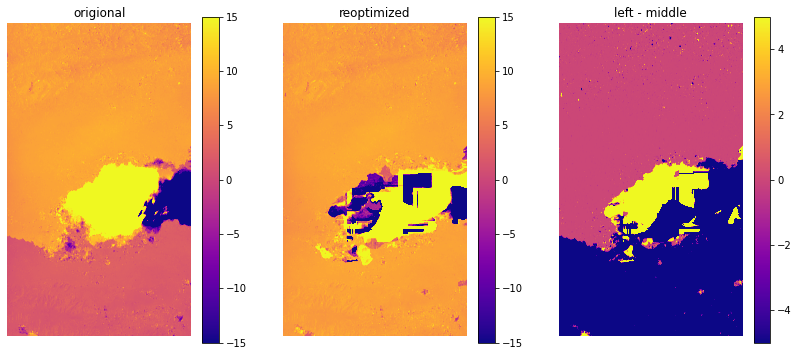

(<Figure size 1008x432 with 6 Axes>,
 array([<AxesSubplot:title={'center':'origional'}>,
        <AxesSubplot:title={'center':'reoptimized'}>,
        <AxesSubplot:title={'center':'left - middle'}>], dtype=object))

In [111]:
plotting.plot_img_diff(
    # arrays=(unw_origional[1]-unw_origional.mean(), unw_script-unw_script.mean()),
    arrays=(unw_origional[1], unw_script),
    cmap="plasma",
    vm=15,
    vdiff=5,
    figsize=(14, 6),
    titles=("origional", "reoptimized")
)